# Live Camera

Install dependencies

In [31]:
pip install opencv-python pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
import tensorflow_hub as hub
import cv2
import numpy
import tensorflow as tf
import pandas as pd
from config import local as _config 
from random import randint

In [33]:
# Carregar modelos
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

cap = cv2.VideoCapture(0)

width = 512
height = 512

font = cv2.FONT_HERSHEY_SIMPLEX 

while(True):
    #Capture frame-by-frame
    ret, frame = cap.read()
    
    #Resize to respect the input_shape
    inp = cv2.resize(frame, (width , height ))

    #Convert img to RGB
    rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

    #Is optional but i recommend (float convertion and convert img to tensor image)
    rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

    #Add dims to rgb_tensor
    rgb_tensor = tf.expand_dims(rgb_tensor , 0)
    
    #boxes, scores, classes, num_detections = detector(rgb_tensor)
    detector_output = detector(rgb_tensor)

    boxes, scores, classes, num_detections = detector_output

    #boxes = detector_output["detection_boxes"]
    #scores = detector_output["detection_scores"]
    #classes = detector_output["detection_classes"]
    #num_detections = detector_output["num_detections"]

    # Processing outputs
    pred_labels = classes.numpy().astype('int')[0] 
    pred_labels = [labels[i] for i in pred_labels]
    pred_boxes = boxes.numpy()[0].astype('int')
    #pred_boxes = boxes.numpy()[0]
    pred_scores = scores.numpy()[0]
    #loop throughout the faces detected and place a box around it
    
    for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{numpy.round(100 * score, decimals=2)}%'
        #_xmin= numpy.round(xmin).astype('int')
        #_ymax = numpy.round(ymax).astype('int')
        #_xmax = numpy.round(xmax).astype('int')
        #_ymin = numpy.round(ymin).astype('int')
        print("{}:[{}] Drawing rectangle ({}, {}), ({}, {})".format(label, score_txt, xmin, ymax, xmax, ymin))
        #random_color=list(numpy.random.choice(range(255),size=3))
        #print("A Random color is:",random_color)
        r = randint(0, 255)
        g = randint(0, 255)
        b = randint(0, 255)
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin), (r, g, b), 2) 
        cv2.putText(img_boxes, label + "("+score_txt+")", (xmin, ymax-10), font, 0.6, (r,g,b), 1, cv2.LINE_AA)



    #Display the resulting frame
    cv2.imshow('black and white',img_boxes)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


person:[80.32%] Drawing rectangle (15, 509), (512, 124)
person:[78.64%] Drawing rectangle (13, 509), (512, 125)
person:[79.56%] Drawing rectangle (13, 509), (511, 125)
person:[79.78%] Drawing rectangle (12, 509), (511, 125)
person:[79.93%] Drawing rectangle (15, 509), (511, 125)
person:[79.7%] Drawing rectangle (13, 509), (512, 125)
person:[79.63%] Drawing rectangle (13, 509), (511, 125)
person:[79.68%] Drawing rectangle (13, 509), (511, 127)
person:[79.39%] Drawing rectangle (15, 509), (512, 125)
person:[79.79%] Drawing rectangle (15, 509), (511, 126)
person:[80.12%] Drawing rectangle (14, 509), (511, 125)
person:[80.94%] Drawing rectangle (17, 509), (512, 125)
person:[80.42%] Drawing rectangle (13, 509), (512, 125)
person:[79.22%] Drawing rectangle (16, 509), (512, 126)
person:[80.01%] Drawing rectangle (14, 509), (512, 125)
person:[79.39%] Drawing rectangle (15, 509), (512, 125)
person:[79.08%] Drawing rectangle (13, 509), (512, 126)
person:[79.81%] Drawing rectangle (14, 509), (512

KeyboardInterrupt: 

: 

# Static Image

In [11]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
# Apply image detector on a batch of image.
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

In [12]:

width = 1028
height = 1028

#Load image by Opencv2
img = cv2.imread('image_1.jpg')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

#Is optional but i recommend (float convertion and convert img to tensor image)
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)

#Now you can use rgb_tensor to predict label for exemple :


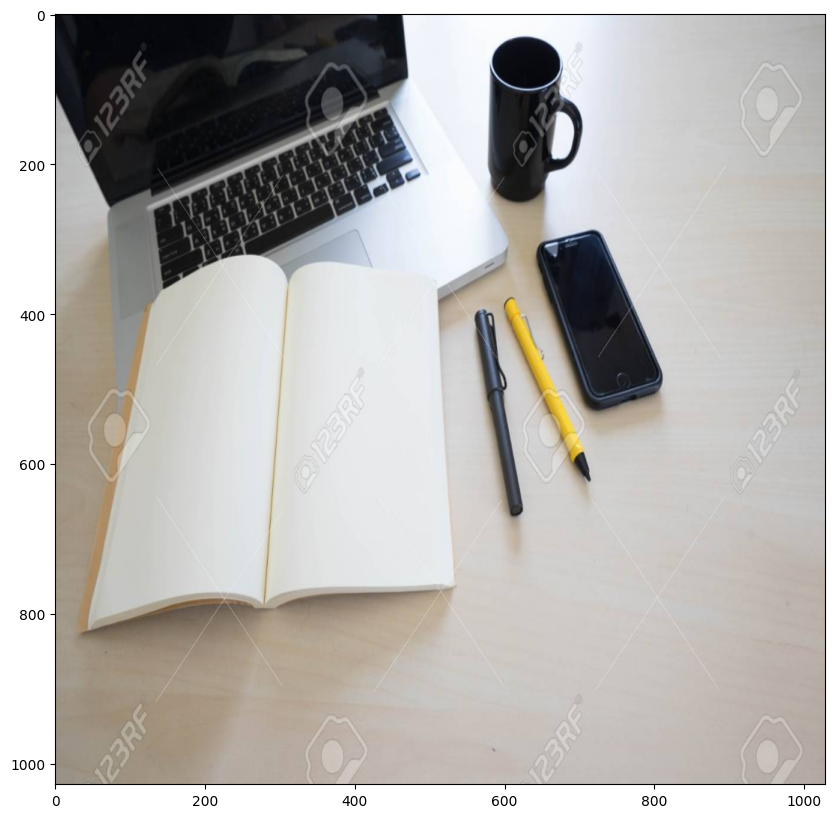

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(rgb)

In [20]:
detector_output = detector(rgb_tensor)
boxes, scores, classes, num_detections = detector_output

#print("detector_output: {}".format(detector_output))
print("classes=",classes)

#class_ids = detector_output["detection_classes"]
#boxes = detector_output["detection_boxes"]
#scores = detector_output["detection_scores"]
#classes = detector_output["detection_classes"]
#num_detections = detector_output["num_detections"]

classes= tf.Tensor(
[[77. 47. 73. 84. 76. 77. 76. 47. 84. 76. 73. 84.  1. 87. 84. 76. 84. 77.
   1. 76. 74. 85. 67. 77. 84. 84. 76. 85. 77.  1.  1. 77. 76. 84. 87. 47.
   1. 74. 76. 47. 84. 87.  1.  1. 87. 85. 84. 67. 84.  1. 77.  1. 84. 73.
  87. 76. 76.  1.  1. 84. 84.  1.  1.  1. 87. 84. 77. 76. 47.  1. 77. 84.
  84. 84. 74.  1. 67. 77.  1. 76.  1.  1. 74. 76. 87. 85. 47. 84. 76. 84.
  47.  1. 84.  1. 84. 77.  1. 84. 77. 84.]], shape=(1, 100), dtype=float32)


In [21]:
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

In [22]:
labels.head()

ID
1        person
2       bicycle
3           car
4    motorcycle
5      airplane
Name: OBJECT (2017 REL.), dtype: object

In [23]:
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
#pred_boxes = boxes.numpy()[0].astype('int')
pred_boxes = boxes.numpy()[0]
pred_scores = scores.numpy()[0]

In [24]:
font = cv2.FONT_HERSHEY_SIMPLEX 

In [26]:
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{numpy.round(100 * score, decimals=2)}%'
        _xmin= numpy.round(xmin).astype('int')
        _ymax = numpy.round(ymax).astype('int')
        _xmax = numpy.round(xmax).astype('int')
        _ymin = numpy.round(ymin).astype('int')

        #print("Drawing rectangle (", xmin, ", ", ymax, "), (", xmax,", ", ymin, ")" )
        print("{}:[{}] Drawing rectangle ({}, {}), ({}, {})".format(label, score_txt, _xmin, _ymax, _xmax, _ymin))
        img_boxes = cv2.rectangle(rgb,(_xmin, _ymax),(_xmax, _ymin), (0,255,0),2) 
        cv2.putText(img_boxes, label + "("+score_txt+")", (_xmin, _ymax-10), font, 0.8, (255,255,0), 2, cv2.LINE_AA)


cell phone:[79.31%] Drawing rectangle (640, 527), (814, 289)
cup:[76.99%] Drawing rectangle (579, 253), (706, 28)
laptop:[70.23%] Drawing rectangle (61, 402), (600, 2)


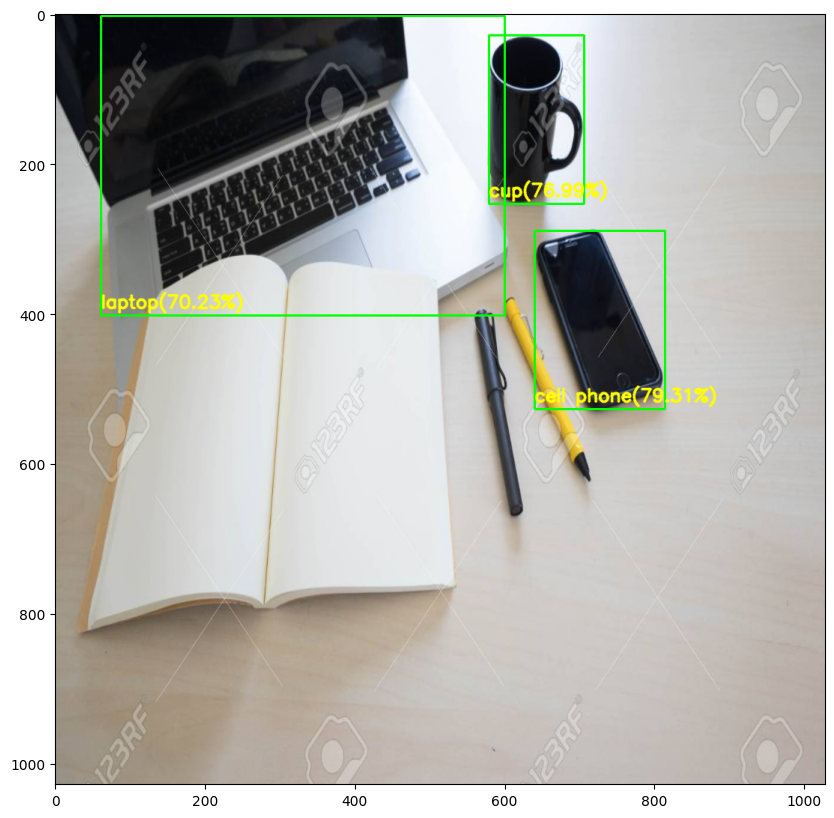

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(img_boxes)
plt.savefig('image_pred.jpg',transparent=True, )